# Projections under RCP 8.5 scenario with NorESM1 forcing in ISMIP6 models of Antarctica

##### Description:
This recipe recreates the visualisations of Section 4.3 of Hélène Seroussi et al. 2020 (https://doi.org/10.5194/tc-14-3033-2020). 

The NorESM1-M RCP 8.5 scenario (exp01 and exp05) produces mid-to-high changes in the ocean and low changes in the atmosphere over the 21st century compared to other CMIP5 AOGCMs (Barthel et al., 2020). The effects of these changes on the simulated evolution of the Antarctic ice sheet and the projected sea level rise are summarized in Figs. 4, 5 and 6. 

##### Written by: 
Paula Boubel, Oct 2024

##### Data requirements: 
The ISMIP6 model projections (see https://theghub.org/groups/ismip6/wiki/ISMIP6-Projections-Antarctica) available now on Gadi in /g/data/kj13/datasets/ismip6/ISMIP6-Projection-AIS

##### Python requirements: 
- Python 3
- xarray
- matplotlib
- numpy
- pandas

In [1]:
# lets import xarray, numpy, and matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import IPython.display

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [31]:
## Load utils.py from wherever it's located
%run -i "/g/data/tm70/pb9726/access-issm-cookbook/ISMIP6/utils.py"

In [25]:
datapath = "/g/data/kj13/datasets/ismip6/ISMIP6-Projection-AIS" # Supply the path to the location of the ISMIP6 model data

ismip6 = AllModels(datapath) # Initialise the AllModels class, which will allow us to find, load, and combine datasets

#For this recipe, we only need to load the following variables:
variables = ['lithk','sftflf','sftgrf','dlithkdt'] # Names of variables to retrieve
org_list = ['AWI','IMAU','ILTS_PIK','LSCE','NCAR','UCIJPL','JPL1','ULB','VUB'] # Models we want to look at 

In [26]:
## Get the data
ism_dataset = ismip6.get_combined_models(org_list, ['ctrl_proj_std','exp05'], variables)

AWI PISM1
IMAU IMAUICE1
IMAU IMAUICE2
ILTS_PIK SICOPOLIS1
LSCE GRISLI2
NCAR CISM
UCIJPL ISSM
JPL1 ISSM
ULB fETISh_32km
ULB fETISh_16km
VUB AISMPALEO


/g/data/xp65/public/apps/med_conda/envs/esmvaltool-0.4/lib/python3.11/site-packages/dask/array/core.py:4832: PerformanceWarning: Increasing number of chunks by factor of 20
  result = blockwise(
/g/data/xp65/public/apps/med_conda/envs/esmvaltool-0.4/lib/python3.11/site-packages/dask/array/core.py:4832: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(


In [36]:
## We now have a dataset combining models and experiments in a standard format
ism_dataset

<xarray.Dataset> Size: 39GB
Dimensions:     (model: 11, experiment: 2, time: 94, bnds: 2, y: 761, x: 761,
                 nv4: 4)
Coordinates:
  * x           (x) float64 6kB -3.04e+03 -3.032e+03 ... 3.032e+03 3.04e+03
  * y           (y) float64 6kB -3.04e+03 -3.032e+03 ... 3.032e+03 3.04e+03
  * time        (time) float64 752B 0.0 1.0 2.0 ... 2.19e+03 2.555e+03 2.92e+03
  * experiment  (experiment) object 16B 'ctrl_proj_std' 'exp05'
    lat         (y, x) float32 2MB -51.85 -51.9 -51.94 ... -51.94 -51.9 -51.85
    lon         (y, x) float32 2MB -135.0 -135.1 -135.2 ... 44.85 44.92 45.0
  * model       (model) object 88B 'AWI/PISM1' ... 'VUB/AISMPALEO'
Dimensions without coordinates: bnds, nv4
Data variables:
    time_bnds   (model, experiment, time, bnds) float64 33kB dask.array<chunksize=(1, 1, 1, 2), meta=np.ndarray>
    dlithkdt    (model, experiment, time, y, x) float64 10GB dask.array<chunksize=(1, 1, 1, 86, 381), meta=np.ndarray>
    lithk       (model, experiment, time, y, x) float64 10GB dask.array<chunksize=(1, 1, 1, 86, 381), meta=np.ndarray>
    sftflf      (model, experiment, time, y, x) float64 10GB dask.array<chunksize=(1, 1, 1, 86, 381), meta=np.ndarray>
    sftgrf      (model, experiment, time, y, x) float64 10GB dask.array<chunksize=(1, 1, 1, 86, 381), meta=np.ndarray>
    lon_bnds    (model, experiment, y, x, nv4) float64 408MB dask.array<chunksize=(2, 1, 381, 381, 1), meta=np.ndarray>
    lat_bnds    (model, experiment, y, x, nv4) float64 408MB dask.array<chunksize=(2, 1, 381, 381, 1), meta=np.ndarray>
    crs         (model, experiment) float64 176B nan nan nan nan ... nan nan nan
    year        (model, experiment, time) float32 8kB dask.array<chunksize=(11, 2, 94), meta=np.ndarray>

## Let's compute ice mass

First we need the total volume of grounded ice. This is done by summing up the product of the ice thickness $h$ with the grid area $\textrm{d}A$ over all grid points $i$, scaled by the fraction of that grid area for which that ice is grounded $F_{\text{grounded}}$: $V_{\text{grounded}} = \sum_i \left( h_{\text{i}} \times \textrm{d}A_i \times F_{\text{grounded},i} \right)$ 

In [27]:
## Get initial ice masses for the JPL1-ISSM model
## We don't need to run this code block to continue

issm_ctrl = ism_dataset.sel(model='JPL1/ISSM',experiment='ctrl_proj_std') # Select JPL1-ISSM as model and control as the experiment

## the lithk variable is the ice thickness in m. 
## passing it to the function 'get_ice_mass_area' calculates an integral over the entire area of Antarctica to return a total ice mass and total area 
total_ice = get_ice_mass_area(issm_ctrl.lithk.isel(time=0)) 
print(total_ice[0].item()*1e7,' Gt of total ice at beginning of experiment')

floating_ice = get_ice_mass_area(issm_ctrl.lithk.isel(time=0),fraction=issm_ctrl.sftflf.isel(time=0))
print(floating_ice[0].item()*1e7,' Gt of floating ice at beginning of experiment')

grounded_ice = get_ice_mass_area(issm_ctrl.lithk.isel(time=0),fraction=issm_ctrl.sftgrf.isel(time=0))
print(grounded_ice[0].item()*1e7,' Gt of grounded ice at beginning of experiment')

# NOTE: 
# lithk = orog - base (ice thickness = surface altitude - base altitude)
# ice thickness = floating ice + grounded ice

23768199.72564113  Gt of total ice at beginning of experiment
564181.1845004548  Gt of floating ice at beginning of experiment
23204018.54114068  Gt of grounded ice at beginning of experiment


## Let's compute the rise in sea level

Then, in order to find the volume of water that would be displaced by this ice, we need to scale by the ratios of density:
$V_{\text{water}} = V_{\text{grounded}} \times \frac{\rho_{\text{ice}}}{\rho_{\text{seawater}}}$

Finally, to get the rise in the sea level, $\Delta h$, we use the surface area of the ocean, $A_{\text{ocean}}$:
$\Delta h = \frac{V_{\text{water}}}{A_{\text{ocean}}} \times 10^6 \, \text{mm}$

The constants $A_{\text{ocean}} = 361.8 \times 10^{6}\,\textrm{km}^{2}$, $\rho_{\text{seawater}} = 1.027\textrm{Gt}\,\textrm{km}^{-3}$, and $\rho_{\text{ice}} = 0.917\,\textrm{Gt}\,\textrm{km}^{-3}$ are defined in utils.py

In [21]:
## Create a new data arary in which we will store our new variable: the sea level rise in mm

num_model = len(ism_dataset.coords['model'])
num_exp = len(ism_dataset.coords['experiment'])
num_tt = len(ism_dataset.coords['time'])

mmSLE = xr.DataArray(
    np.zeros((num_tt, num_exp, num_model)),
    dims=['time', 'experiment', 'model'],
    coords={
        'time': ism_dataset.coords['time'],
        'experiment': ism_dataset.coords['experiment'],
        'model': ism_dataset.coords['model']
    },
    name='mmsle'  # Name of the new variable
)

print('Calculating sea level rise projection from '+model)

## Iterate through all models and experiments and compute the total ice mass and corresponding sea level rise, then store the result in mmSLE
## Note: in each case, we subtract the value obtained from the 'control' experiment

for i in range(num_model):
    model = str(ism_dataset.coords['model'][i].data)
    print(model)
    ism_model = ism_dataset.sel(model=model)
    ice_mass_ctrl = get_ice_mass_area(ism_model.sel(experiment='ctrl_proj_std').lithk,fraction=ism_model.sel(experiment='ctrl_proj_std').sftgrf.isel(time=0))[0]
    for j in range(num_exp):
        exp = str(ism_dataset.coords['experiment'][j].data)
        ice_mass_exp = get_ice_mass_area(ism_model.sel(experiment=exp).lithk,fraction=ism_model.sel(experiment=exp).sftgrf.isel(time=0))[0]
        ice_above_floatation = ice_mass_exp.values - ice_mass_ctrl.values
        sle = sea_level_rise(-ice_above_floatation*1e7)
        mmSLE.sel(experiment=exp,model=model)[:] = sle
        
ism_dataset['mmsle'] = mmSLE

AWI/PISM1
IMAU/IMAUICE1
IMAU/IMAUICE2
ILTS_PIK/SICOPOLIS1
LSCE/GRISLI2
NCAR/CISM
UCIJPL/ISSM
JPL1/ISSM
ULB/fETISh_32km
ULB/fETISh_16km
VUB/AISMPALEO


## Save the dataset as an nc file

In [ ]:
## Save this dataset to use again later
# filename = '/g/data/tm70/pb9726/access-issm-cookbook/ISMIP6/fig4_dat.nc'
# print ('saving to ', filename)
# ism_dataset.to_netcdf(path=filename)
# ism_dataset.close()
# print ('finished saving')

## Figure 4

Now we can compare the projections from each model. This figure shows the evolution of ice volume above floatation (in mm SLE) over 2015–2100 from the NorESM1-M RCP 8.5 scenario (exp01 and exp05) relative to ctrl_proj.

(array([-50.,   0.,  50., 100., 150., 200.]),
 [Text(0, -50.0, '−50'),
  Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200')])

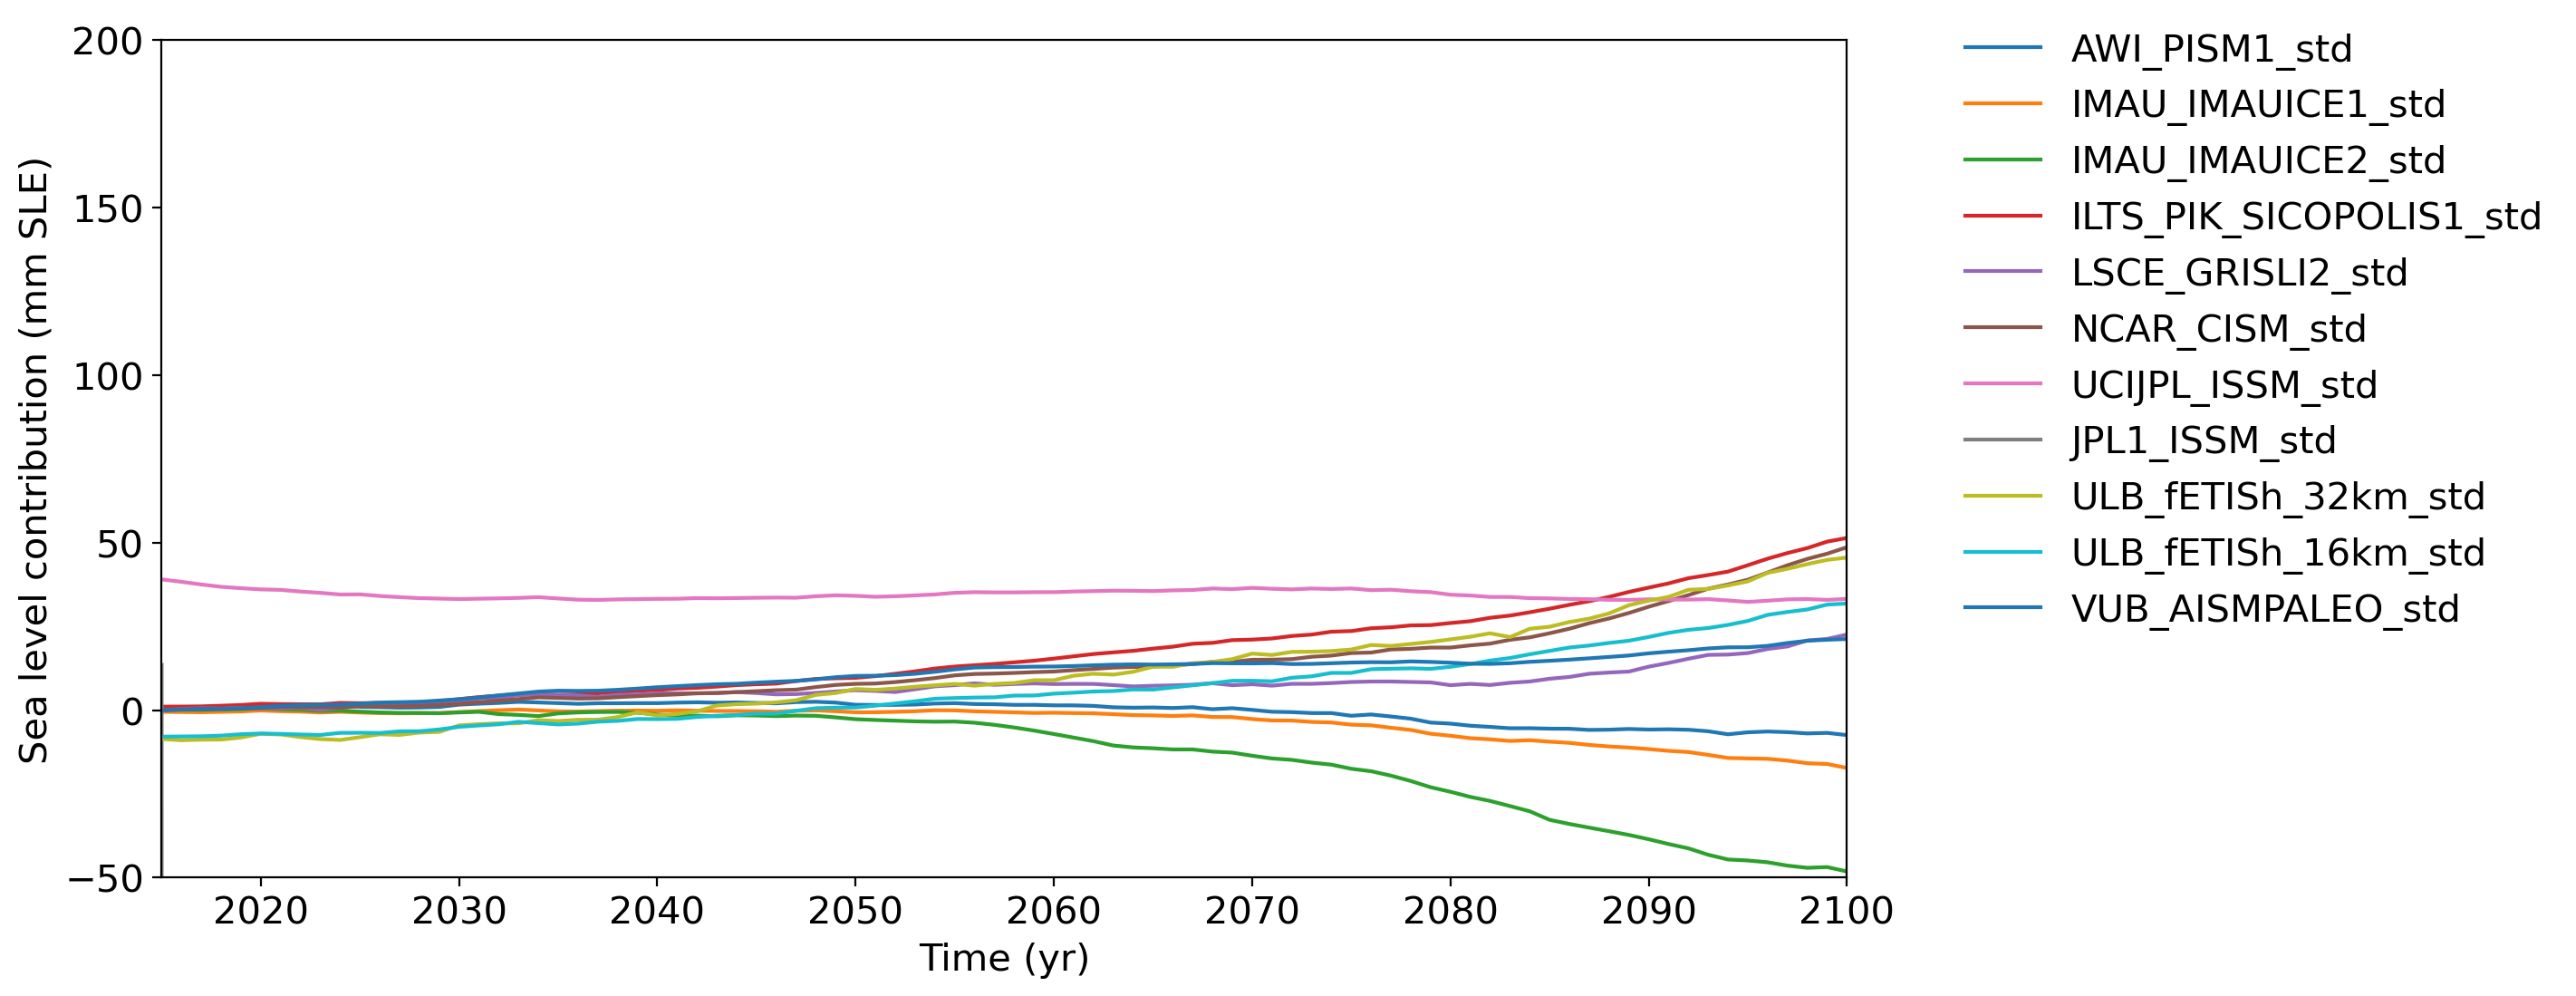

In [23]:
plt.figure(figsize=(12,6))

years = 2015 + np.arange(num_tt)

for model in ismip6.modellist:
    label = model.replace('/','_')+'_std'
    plt.plot(years, ism_dataset.sel(model=model).sel(experiment='exp05').mmsle, label=label)

plt.legend(fontsize=15, bbox_to_anchor=(1.05, 1.05), frameon=False)
plt.ylabel(r'Sea level contribution (mm SLE)', fontsize=15)
plt.xlabel('Time (yr)', fontsize=15)
plt.ylim(-50,200)
plt.xlim(2015, 2100)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('figure4.png')

## Figure 6

We can visualise where the greatest change in ice thickness is occuring on the ice sheet. This figure shows the mean (a and b) and standard deviation (c and d) of simulated thickness change (a and c, in m) and velocity change (b and d, in m yr−1) between 2015 and 2100 under medium forcing from the NorESM1-M RCP 8.5 scenario (exp01 and exp05) relative to ctrl_proj.

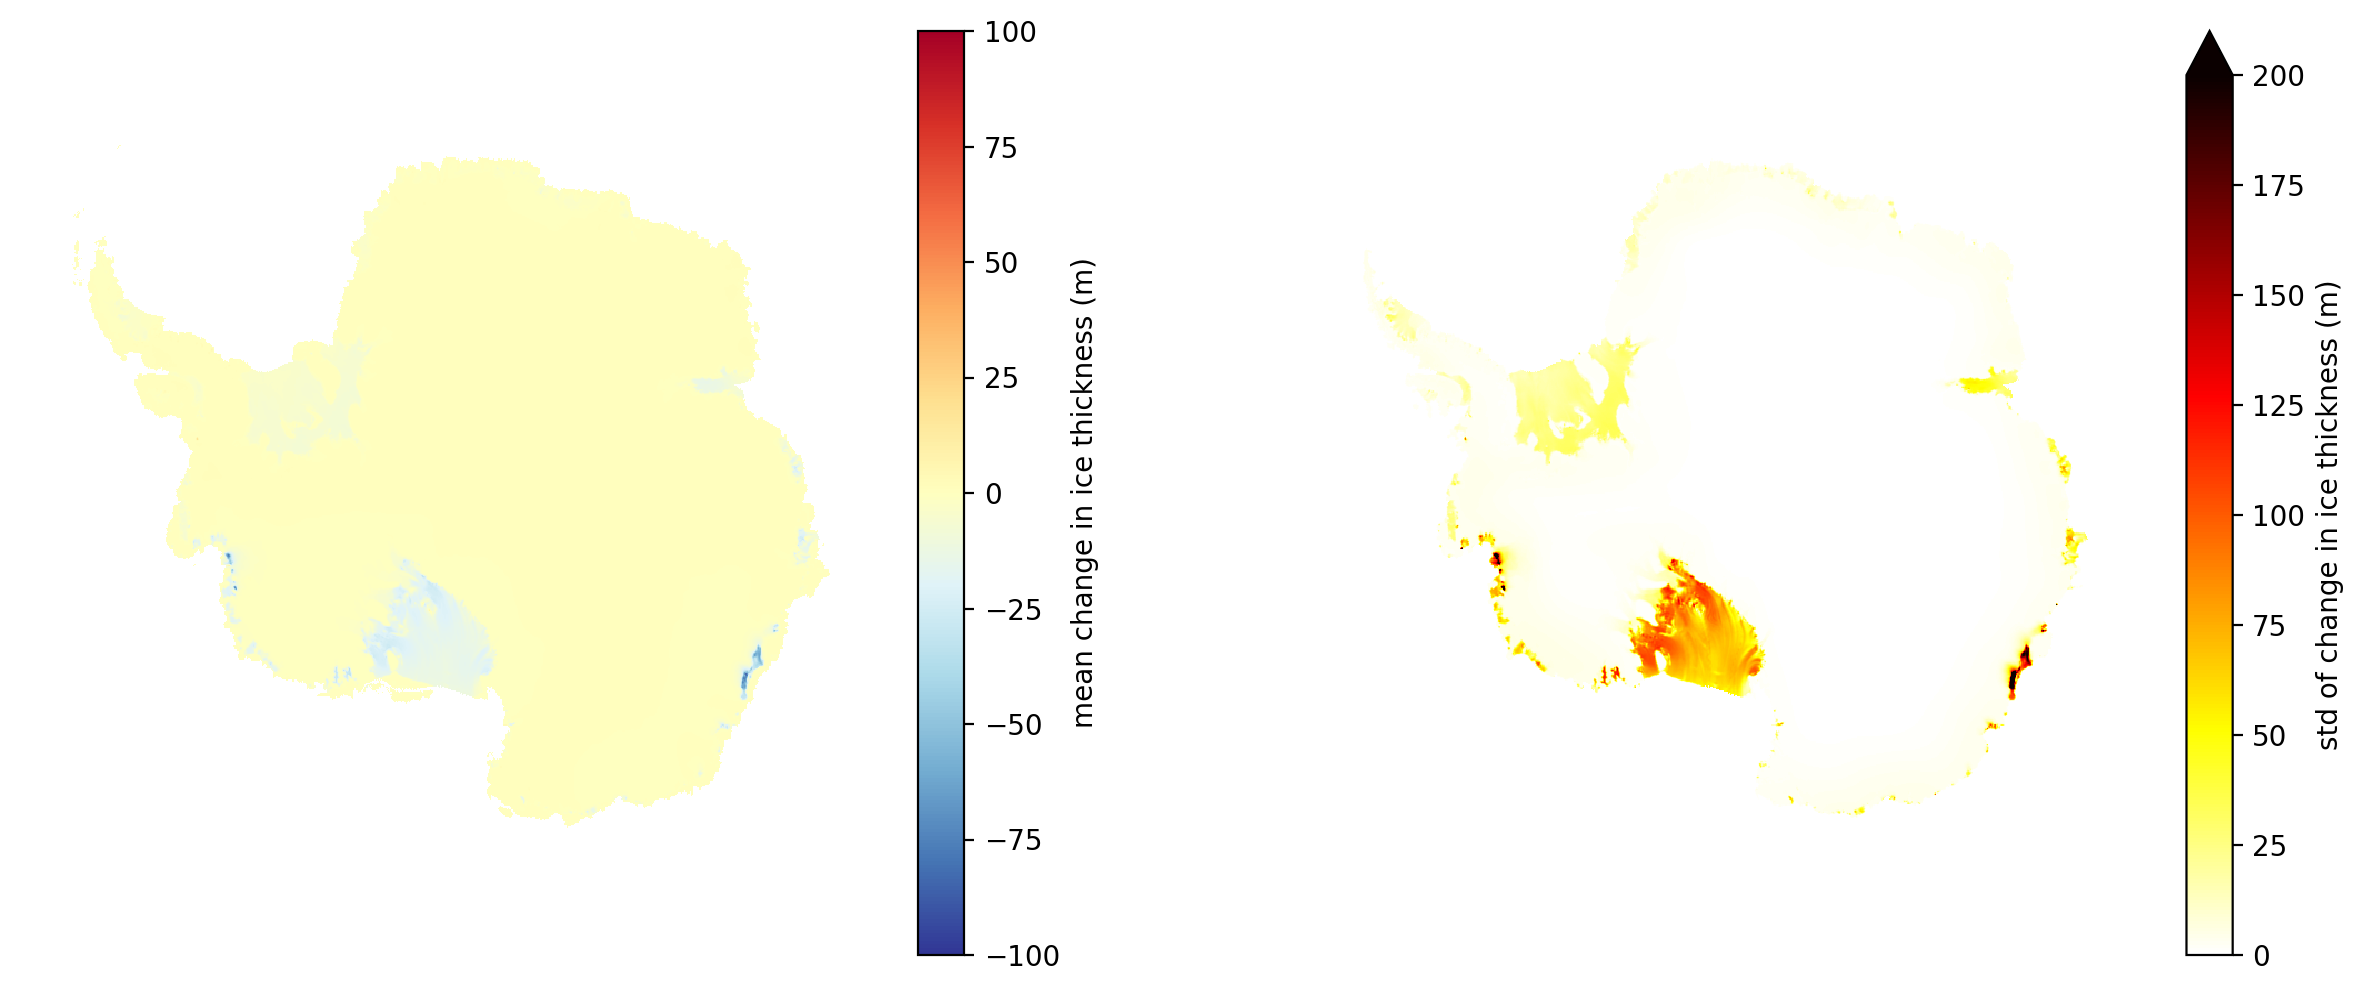

In [27]:
fig, axs = plt.subplots(ncols=2, figsize=(15,6))

seconds_per_year = 60*60*24*365

## why multiply by number of years rather than the number of seconds??

# find the mean of tendency of land ice thickness in m/s
frac_land_ice = ism_dataset.sftgrf.sel(experiment='exp05',time=0,model=ismip6.modellist[0])
mean_thickness = num_tt*ism_dataset.sel(experiment='exp05').dlithkdt.mean(dim=['time','model'], skipna=True)
mean_thickness += frac_land_ice.where(np.isnan(frac_land_ice), other=0)

std_thickness = num_tt*ism_dataset.sel(experiment='exp05').dlithkdt.std(dim=['time','model'], skipna=True)
std_thickness += frac_land_ice.where(np.isnan(frac_land_ice), other=0)

im1 = mean_thickness.plot(ax=axs[0], cmap='RdYlBu_r', vmin=-100, vmax=100)
im2 = std_thickness.plot(ax=axs[1], cmap='hot_r', vmin=0, vmax=200)
axs[0].set_title('')
axs[0].axis('off')
im1.colorbar.set_label('mean change in ice thickness (m)')

axs[1].set_title('')
axs[1].axis('off')
im2.colorbar.set_label('std of change in ice thickness (m)')

plt.savefig('figure6.png')